### More plotting with `matplotlib` and `seaborn`

Today we continue to work with `matplotlib`, focusing on customization and using subplots.  Also, the `seaborn` library will be introduced as a second visualization library with additional functionality for plotting data.

In [1]:
#!pip install -U seaborn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Subplots and Axes

![](https://matplotlib.org/stable/_images/users-explain-axes-index-1.2x.png)

array([<Axes: >, <Axes: >], dtype=object)

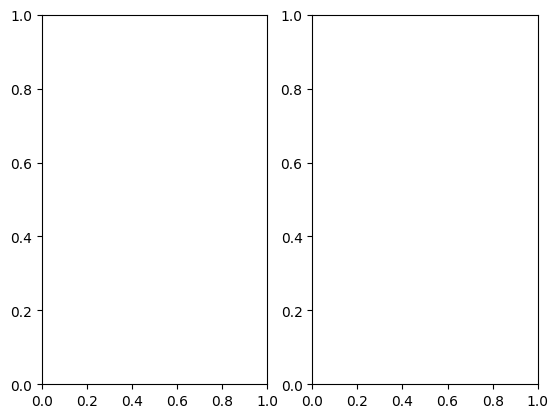

In [3]:
### create a 1 row 2 column plot
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax

NameError: name 'appl' is not defined

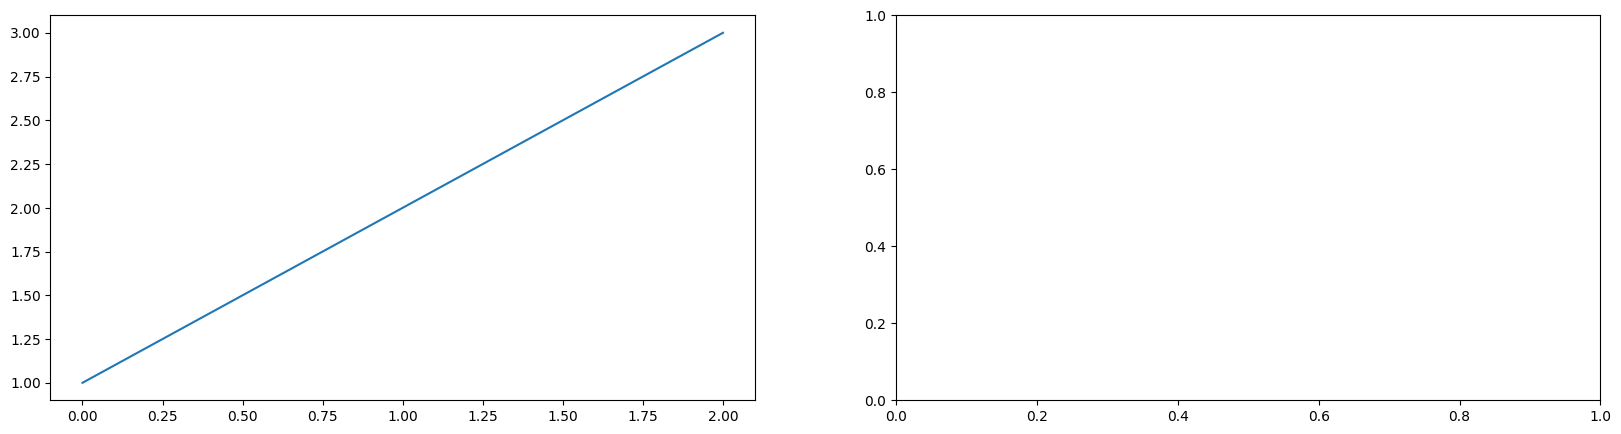

In [4]:
### add a plot to each axis
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot([1, 2, 3])
ax[1].hist(appl['Adj Close']);
ax[0].set_title('A Line');

In [ ]:
### create a 2 x 2 grid of plots
### add histogram to bottom right plot
fig, ax = plt.subplots(nrows=2, ncols = 2)
#bottom right?
d

In [ ]:
### titles and labels
ax[1, 1].set_title('Histogram of Adjusted Close')

#### `3D Plotting`

There are additional projections available including polar and three dimensional projections.  These can be accessed through the `projection` argument in the `axes` functions.

- [3d plotting](https://matplotlib.org/stable/gallery/mplot3d/index.html)

In [ ]:
def f(x, y):
    return x**2 - y**2
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

In [ ]:
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, f(X, Y))
ax.set_title('Using 3d projection');

In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
ax = plt.axes(projection = 'polar')
ax.plot(theta, r)
ax.set_title('Basic polar coordinate plot');

### `Gridspec`

If you want to change the layout and organization of the subplot the `Gridspec` object allows you to specify additional information about width and height ratios of the subplots.  Examples below are from the documentation [here](https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html#gridspec-demo).

In [ ]:
from matplotlib.gridspec import GridSpec

In [ ]:
#helper for annotating
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

In [ ]:
fig = plt.figure()
fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios")

gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

annotate_axes(fig)

In [ ]:
fig = plt.figure()
fig.suptitle("Controlling spacing around and between subplots")

gs1 = GridSpec(3, 3, left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])

gs2 = GridSpec(3, 3, left=0.55, right=0.98, hspace=0.05)
ax4 = fig.add_subplot(gs2[:, :-1])
ax5 = fig.add_subplot(gs2[:-1, -1])
ax6 = fig.add_subplot(gs2[-1, -1])

annotate_axes(fig)

plt.show()

#### Problems

1. Use the housing data to create a 1 x 2 array of plots with a scatterplot of `Latitude` vs. `Longitude` colored by `MedHouseVal` and a histogram of the `MedHouseVal`.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing(as_frame=True).frame

In [ ]:
housing.head()

2. Use the documentation of the `fill_between` function to demonstrate its use by creating a line plot of the `dow` data filled underneath.  What does the `hatch` argument control?

In [ ]:
dow = sns.load_dataset('dowjones')
dow.head()

In [ ]:
# plt.fill_between?

#### Introduction to `seaborn`

The `seaborn` library is built on top of `matplotlib` and offers high level visualization tools for plotting data.  Typically a call to the `seaborn` library looks like:

```
plottype(data, x = x, y = y, additional arguments...)
```

In [ ]:
### load a sample dataset on tips
tips = sns.load_dataset('tips')

In [ ]:
### boxplot of tips by day
sns.boxplot(data = tips, x = 'day', y = 'tip')
plt.title('Tips by Day');

In [ ]:
### boxplot of tips by day by smoker
sns.boxplot(data = tips, x = 'day', y = 'tip', hue = 'smoker')

#### `displot`

For visualizing one dimensional distributions of data.

In [ ]:
### histogram of tips
sns.displot(data = tips, x = 'tip')

In [ ]:
### kde plot
sns.displot(data = tips, x = 'tip', kind = 'kde')

In [ ]:
### empirical cumulative distribution plot of tips by smoker
sns.displot(data = tips, x = 'tip', kind = 'ecdf', hue = 'smoker')

In [ ]:
### using the col argument
sns.displot(data = tips, x = 'tip', col = 'smoker')

In [ ]:
#draw a histogram and a boxplot using seaborn on two axes
fig, ax = plt.subplots(1, 2)
sns.histplot(data = tips, x = 'tip', ax = ax[0])
sns.boxplot(data = tips, x = 'day', y = 'tip', ax = ax[1])
ax[1].set_title('Boxplots')
fig.suptitle('This is a title for everything');

#### `relplot`

For visualizing relationships.

In [ ]:
### relplot of bill vs. tip
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

In [ ]:
### regression plot
sns.regplot(data = tips, x ='total_bill', y = 'tip')

In [ ]:
### swarm
sns.swarmplot(data = tips, x = 'smoker', y = 'tip')

In [ ]:
### violin plot
sns.violinplot(data = tips, x = 'smoker', y = 'tip')

In [ ]:
### countplot
sns.countplot(data = tips, x = 'smoker');

1. Create a histogram of flipper length by species.  

In [ ]:
penguins = sns.load_dataset('penguins')

2. Create a scatterplot of bill length vs. flipper length.

3. Create a violin plot of each species mass split by sex.

#### Additional Plots

- `pairplot`
- `heatmap`

In [ ]:
penguins = sns.load_dataset('penguins').dropna()

In [ ]:
### pairplot of penguins colored by species
sns.pairplot(data = penguins, hue = 'species')

In [ ]:
### housing data
housing.head()

In [ ]:
### correlation in data
housing.corr()

In [ ]:
### heatmap of correlations
sns.heatmap(housing.corr(), annot = True)

#### Problems

Use the `diabetes` data below loaded from OpenML ([docs](https://www.openml.org/search?type=data&sort=runs&status=active&id=37)).  

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
diabetes = fetch_openml(data_id = 37).frame

In [ ]:
diabetes.head()

1. Distribution of ages separated by class.

2. Heatmap of features.  Any strong correlations?

3. **CHALLENGE**: 2 rows and 4 columns with histograms separated by class column.  Which feature has the most distinct difference between classes?

#### Review



In [ ]:
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

**EXERCISE**

- Set 'Food' as the index of cals.
- Create a bar chart with calories.
- Add a title.
- Change the color of the bars.  
- Add the argument alpha=0.5.  What does it do?
- Change your chart to a horizontal bar chart.  Which do you prefer?